# Comparaison des déploiements EnR

In [1]:
import pandas

from models.electricity_mix import electricity_mix
from models.energy import energy
from models.population_density import population_density
from models.ghg_emissions import ghg_emissions
import plot_utils

### Motivation

Fact-check de "la France est à la traîne sur tous les pays sur les EnR"


### Quelques essais

**Top 15 mix éolien/solaire :** (en %)

In [2]:
(electricity_mix["wind_solar"] / electricity_mix["total"])\
    .sort_values(ascending=False)\
    .head(n=15)

code
FLK    0.471888
DNK    0.399084
LTU    0.245208
PRT    0.230184
ESP    0.222021
IRL    0.208658
DEU    0.177094
CPV    0.176191
URY    0.160920
ABW    0.158505
GRC    0.140370
NIC    0.140308
FRO    0.124036
GBR    0.120738
ITA    0.118883
dtype: float64

- FLK : Falkland Islands - archipel à la pointe de l'Amérique du Sud (4 000 habitants)
- CPV : Cap Vert (PIB/habitant : 8 000 $)
- FRO : iles Féroé au nord du Danemark

**Top 15 par production éolien/solaire en valeur absolue :**

In [3]:
electricity_mix["wind_solar"].sort_values(ascending=False).head(n=15)

code
FLK    2.617886
DNK    2.270638
ABW    1.376796
ESP    1.326493
DEU    1.308566
IRL    1.269119
SWE    1.262669
PRT    1.176201
FRO    0.762639
AUS    0.742794
USA    0.736880
GRC    0.710370
BEL    0.677275
CAN    0.645798
GBR    0.635533
Name: wind_solar, dtype: float64

- Australie, USA et Canada sont d'énormes producteurs de pétrole et charbon

### Problème mieux posé

=> Comparer ce qui est copiable d'un pays à l'autre, et actionnable à population stable :

$$
\text{mix éolien-solaire}
= \dfrac{\text{éolien-solaire}}{\text{énergie}}
= \dfrac{ ~~ \Big( \dfrac{\text{éolien-solaire}}{\text{surface}} \Big)_a \times \Big( \dfrac{\text{surface}}{\text{personne}} \Big)_b ~~ }{ ~~ \Big( \dfrac{\text{énergie}}{\text{personne}} \Big)_c ~~ }
$$

- a: déterminé par les politiques publiques -> copiable
- b: fixe et hors problème
- c: caractérise notre niveau de vie -> pour comparer avec des pays similaires

**On cherche de meilleures densités éolien-solaire (a) dans des pays à niveau de vie comparable (c) et avec une empreinte carbone correcte.**

### Analyse

On croise 4 sources :

- Electricity Mix per capita: BP Statistical Review of World Energy; Ember via [Our World in Data](https://ourworldindata.org/grapher/per-capita-electricity-source-stacked?country=OWID_WRL~CHN~IND~USA~JPN~DEU~GBR~BRA~FRA~CAN~SWE~ZAF)
- Energy: BP Statistical Review of World Energy ; U.S. Energy Information Administration (EIA) via [Our World in Data](https://ourworldindata.org/explorers/energy?tab=chart&facet=none&country=USA~GBR~CHN~OWID_WRL~IND~BRA~ZAF&hideControls=false&Total+or+Breakdown=Total&Energy+or+Electricity=Primary+energy&Metric=Per+capita+consumption)
- GHG Emissions: Global Carbon Project via [Our World in Data](https://ourworldindata.org/explorers/co2?facet=none&country=CHN~USA~IND~GBR~OWID_WRL&Gas=CO%E2%82%82&Accounting=Consumption-based&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+capita)
- Population Density: [World Bank](https://data.worldbank.org/indicator/EN.POP.DNST)


In [4]:
all_countries = pandas.DataFrame()

all_countries["energy_per_capita"] = energy["energy"]
all_countries["wind_solar_density"] = electricity_mix["wind_solar"] * population_density["density"]
all_countries["ghg_emissions"] = ghg_emissions["ghg_emissions"]

Recherche de pays "similaires" :

In [5]:
france_data = all_countries.loc["FRA"]

def is_country_similar(country_data):
    return (

        # Energy per capita: between 1/3 and 3x France
        (country_data["energy_per_capita"] >= 0.3 * france_data["energy_per_capita"])
        & (country_data["energy_per_capita"] <= 3 * france_data["energy_per_capita"])

        # Wind & solar density: at least 50% of France
        & (country_data["wind_solar_density"] >= france_data["wind_solar_density"] * 0.5)

        # GHG emissions: at most 2x France
        & (country_data["ghg_emissions"] < 2 * france_data["ghg_emissions"])

    )

similar_countries = all_countries[is_country_similar]

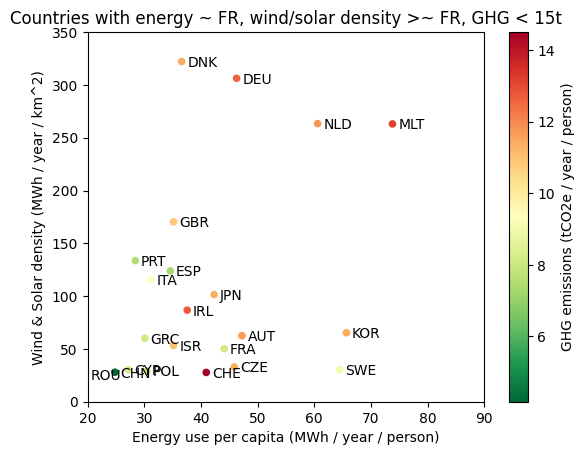

In [6]:
plot_utils.scatter_plot(
    similar_countries,
    title="Countries with energy ~ FR, wind/solar density >~ FR, GHG < 15t",
    x="energy_per_capita",
    xlabel="Energy use per capita (MWh / year / person)",
    xlim=(20, 90),
    y="wind_solar_density",
    ylabel="Wind & Solar density (MWh / year / km^2)",
    ylim=(0, 350),
    c="ghg_emissions",
    colormap="ghg",
    clabel="GHG emissions (tCO2e / year / person)",
    annotations=similar_countries.index.to_series(),
    annotations_delta_x=1,
    annotations_delta_y=-5
)

### Conclusions

- La France a une des plus faibles densités éolien-solaire de son "segment"
- Les pays à très forte densité (Danemark, Allemagne, Pays-Bas, Malte) ont une empreinte carbone > 11 tCO2e/hab/an
    - A cause des flexibilités EnR ?
    - ou de transports/industries carbonés par ailleurs ? (dans ce cas : intéressants)
- Idées reçues sur la Suède, Norvège, Finlande : mauvaises performances
- Portugal, Espagne, Italie, Grèce relèvent le double challenge densité EnR + bonne empreinte carbone, avec une conso énergétique vivable (60% France)


---

Raphaël Kolm – https://kolm.fr - CC BY-NC-SA

In [7]:
from IPython.core.display import HTML
HTML("""
<style>
.jp-CodeCell .jp-Cell-inputWrapper {
    display: none;
}
.jp-OutputPrompt {
    visibility: hidden;
}
</style>
""")